In [1]:
#import spikeinterface modules
import spikeinterface as si
import spikeinterface.extractors as se
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import numpy as np
import glob

#import everything else
import os
import sys
import numpy as np
import neo
import pandas as pd
import h5py
import McsPy
import sys, importlib, os
import McsPy.McsData
import McsPy.McsCMOS
from McsPy import ureg, Q_
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

from time import strftime
%matplotlib inline

In [2]:
#outpath = 'D:\Files_Reutlingen_Jenny\main_191021extra\_output_Spikesorting_19042021_aCSF_adult_15min_spont_spikesorting'
outpath = 'D:\Files_Reutlingen_Jenny\main_191021extra\_output_Spikesorting_23042021_hCSF_adult_20min_spont0002_spikesorting'

In [3]:
os.chdir(outpath)

In [4]:
framefiles = glob.glob('*0.pkl')

In [5]:
framefiles

['DF_hCSF_adult_20min_spont0002_sec_0-300.pkl',
 'DF_hCSF_adult_20min_spont0002_sec_300-600.pkl',
 'DF_hCSF_adult_20min_spont0002_sec_600-900.pkl']

In [6]:
filebase = framefiles[0].split('DF_')[1].split('_sec')[0]

In [7]:
# load all dataframes
df0 = pd.read_pickle(framefiles[0])
df1 = pd.read_pickle(framefiles[1])
df2 = pd.read_pickle(framefiles[2])

In [8]:
completeframe = df0.append([df1, df2])

In [24]:
#completeframe.to_pickle(str('DF_' + filebase + '_' + 'complete') + '_df.pkl')

In [15]:
# load completeframe
completeframe_hCSF = pd.read_pickle('DF_hCSF_adult_20min_spont0002_complete_df.pkl')

In [17]:
completeframe_hCSF

,unit_ids,max_channel,channellabel,n_spikes,firing_rate,layer,file,subrecording,recordingdate
0,0,0.0,R12,449.0,1.496667,layer2-3,hCSF_adult_20min_spont0002,sec_0-300,21.10.2019
1,1,0.0,R12,58.0,0.193333,layer2-3,hCSF_adult_20min_spont0002,sec_0-300,21.10.2019
2,10,20.0,H1,323.0,1.076667,layer5-6,hCSF_adult_20min_spont0002,sec_0-300,21.10.2019
3,100,242.0,E14,581.0,1.936667,layer5-6,hCSF_adult_20min_spont0002,sec_0-300,21.10.2019
4,101,242.0,E14,1258.0,4.193333,layer5-6,hCSF_adult_20min_spont0002,sec_0-300,21.10.2019
...,...,...,...,...,...,...,...,...,...
871,95,252.0,E5,667.0,2.223333,layer5-6,hCSF_adult_20min_spont0002,sec_600-900,21.10.2019
872,96,25.0,F3,15.0,0.050000,layer5-6,hCSF_adult_20min_spont0002,sec_600-900,21.10.2019
873,97,1.0,L10,3163.0,10.543333,layer4,hCSF_adult_20min_spont0002,sec_600-900,21.10.2019
874,98,1.0,L10,1777.0,5.923333,layer4,hCSF_adult_20min_spont0002,sec_600-900,21.10.2019


In [20]:
outpath = 'D:\Files_Reutlingen_Jenny\main_191021extra\_output_Spikesorting_19042021_aCSF_adult_15min_spont_spikesorting'
os.chdir(outpath)

In [21]:
completeframe_aCSF = pd.read_pickle('DF_aCSF_adult_15min_spont_complete_df.pkl')

In [22]:
fullframe = completeframe_aCSF.append(completeframe_hCSF)

In [23]:
fullframe

,unit_ids,max_channel,channellabel,n_spikes,firing_rate,layer,file,subrecording,recordingdate
0,0,0.0,R12,52.0,0.173333,layer2-3,aCSF_adult_15min_spont,sec_0-300,21.10.2019
1,1,10.0,R4,377.0,1.256667,layer2-3,aCSF_adult_15min_spont,sec_0-300,21.10.2019
2,10,30.0,O11,281.0,0.936667,layer2-3,aCSF_adult_15min_spont,sec_0-300,21.10.2019
3,100,61.0,I14,207.0,0.690000,layer5-6,aCSF_adult_15min_spont,sec_0-300,21.10.2019
4,101,61.0,I14,677.0,2.256667,layer5-6,aCSF_adult_15min_spont,sec_0-300,21.10.2019
...,...,...,...,...,...,...,...,...,...
871,95,252.0,E5,667.0,2.223333,layer5-6,hCSF_adult_20min_spont0002,sec_600-900,21.10.2019
872,96,25.0,F3,15.0,0.050000,layer5-6,hCSF_adult_20min_spont0002,sec_600-900,21.10.2019
873,97,1.0,L10,3163.0,10.543333,layer4,hCSF_adult_20min_spont0002,sec_600-900,21.10.2019
874,98,1.0,L10,1777.0,5.923333,layer4,hCSF_adult_20min_spont0002,sec_600-900,21.10.2019


In [25]:
fullframe['medium']=fullframe['file']

In [41]:
for i in range(1, len(fullframe)):
    fullframe.iloc[int(i)]['medium']=fullframe.iloc[int(i)]['file'].split('_')[0]

<ipython-input-41-14024589eec3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fullframe.iloc[int(i)]['medium']=fullframe.iloc[int(i)]['file'].split('_')[0]


AttributeError: 'float' object has no attribute 'split'

In [33]:
fullframe.iloc[0]['file'].split('_')

['aCSF', 'adult', '15min', 'spont']

In [59]:
unique_files = fullframe.file.unique()
for i in unique_files:
    fullframe.loc[(fullframe['file']==i, 'medium')] = str(i).split('_')[0]

#fullframe.loc[(fullframe['file']== 'nan')]

In [60]:
fullframe

,unit_ids,max_channel,channellabel,n_spikes,firing_rate,layer,file,subrecording,recordingdate,medium
0,0,0.0,R12,52.0,0.173333,layer2-3,aCSF_adult_15min_spont,sec_0-300,21.10.2019,aCSF
1,1,10.0,R4,377.0,1.256667,layer2-3,aCSF_adult_15min_spont,sec_0-300,21.10.2019,aCSF
2,10,30.0,O11,281.0,0.936667,layer2-3,aCSF_adult_15min_spont,sec_0-300,21.10.2019,aCSF
3,100,61.0,I14,207.0,0.690000,layer5-6,aCSF_adult_15min_spont,sec_0-300,21.10.2019,aCSF
4,101,61.0,I14,677.0,2.256667,layer5-6,aCSF_adult_15min_spont,sec_0-300,21.10.2019,aCSF
...,...,...,...,...,...,...,...,...,...,...
871,95,252.0,E5,667.0,2.223333,layer5-6,hCSF_adult_20min_spont0002,sec_600-900,21.10.2019,hCSF
872,96,25.0,F3,15.0,0.050000,layer5-6,hCSF_adult_20min_spont0002,sec_600-900,21.10.2019,hCSF
873,97,1.0,L10,3163.0,10.543333,layer4,hCSF_adult_20min_spont0002,sec_600-900,21.10.2019,hCSF
874,98,1.0,L10,1777.0,5.923333,layer4,hCSF_adult_20min_spont0002,sec_600-900,21.10.2019,hCSF


In [46]:
fullframe

,unit_ids,max_channel,channellabel,n_spikes,firing_rate,layer,file,subrecording,recordingdate,medium
0,0,0.0,R12,52.0,0.173333,layer2-3,aCSF_adult_15min_spont,sec_0-300,21.10.2019,aCSF_adult_15min_spont
1,1,10.0,R4,377.0,1.256667,layer2-3,aCSF_adult_15min_spont,sec_0-300,21.10.2019,aCSF_adult_15min_spont
2,10,30.0,O11,281.0,0.936667,layer2-3,aCSF_adult_15min_spont,sec_0-300,21.10.2019,aCSF_adult_15min_spont
3,100,61.0,I14,207.0,0.690000,layer5-6,aCSF_adult_15min_spont,sec_0-300,21.10.2019,aCSF_adult_15min_spont
4,101,61.0,I14,677.0,2.256667,layer5-6,aCSF_adult_15min_spont,sec_0-300,21.10.2019,aCSF_adult_15min_spont
...,...,...,...,...,...,...,...,...,...,...
871,95,252.0,E5,667.0,2.223333,layer5-6,hCSF_adult_20min_spont0002,sec_600-900,21.10.2019,hCSF_adult_20min_spont0002
872,96,25.0,F3,15.0,0.050000,layer5-6,hCSF_adult_20min_spont0002,sec_600-900,21.10.2019,hCSF_adult_20min_spont0002
873,97,1.0,L10,3163.0,10.543333,layer4,hCSF_adult_20min_spont0002,sec_600-900,21.10.2019,hCSF_adult_20min_spont0002
874,98,1.0,L10,1777.0,5.923333,layer4,hCSF_adult_20min_spont0002,sec_600-900,21.10.2019,hCSF_adult_20min_spont0002


In [11]:
completeframe_fr_filtered = completeframe[(completeframe['firing_rate']>=0.5)]

layer2_3 = completeframe.loc[completeframe.layer == 'layer2-3', 'firing_rate']
layer4 = completeframe.loc[completeframe.layer == 'layer4', 'firing_rate']
layer5_6 = completeframe.loc[completeframe.layer == 'layer5-6', 'firing_rate']
wm = completeframe.loc[completeframe.layer == 'whitematter', 'firing_rate']

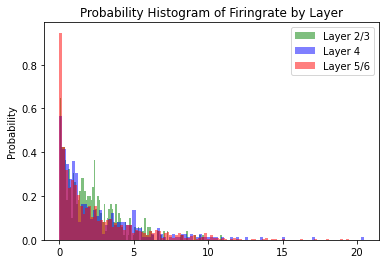

In [12]:
kwargs = dict(alpha=0.5, bins=100, density = True, stacked = True)

plt.hist(layer2_3, **kwargs, color='g', label='Layer 2/3')
plt.hist(layer4, **kwargs, color='b', label = 'Layer 4')
plt.hist(layer5_6, **kwargs, color='r', label = 'Layer 5/6')
plt.gca().set(title='Probability Histogram of Firingrate by Layer', ylabel='Probability')
plt.legend()

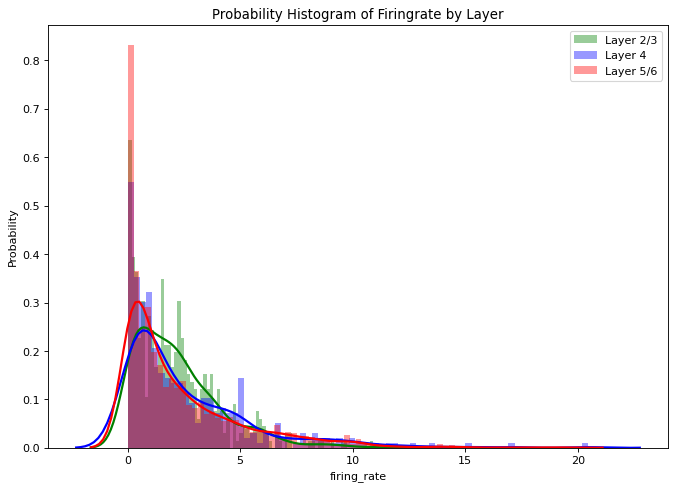

In [13]:
kwargs = dict(hist_kws={'alpha':.4}, kde_kws={'linewidth':2}, bins=75)

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(layer2_3, **kwargs, color='g', label='Layer 2/3')
sns.distplot(layer4, **kwargs, color='b', label = 'Layer 4')
sns.distplot(layer5_6, **kwargs, color='r', label = 'Layer 5/6')
#sns.distplot(wm, **kwargs, color='y', label = 'Whitematter')
plt.gca().set(title='Probability Histogram of Firingrate by Layer', ylabel='Probability')
plt.legend()

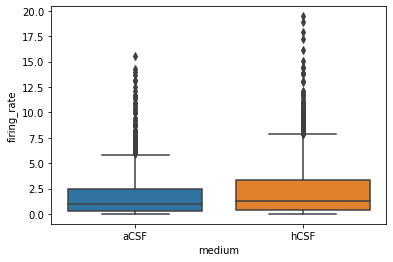

In [66]:
ax = sns.boxplot(x="medium", y="firing_rate", data=fullframe[(fullframe['layer']=='layer5-6')])

In [ ]:
kwargs = dict(alpha=0.5, bins=100, density = True, stacked = True)

plt.hist(layer2_3, **kwargs, color='g', label='Layer 2/3')
plt.hist(layer4, **kwargs, color='b', label = 'Layer 4')
plt.hist(layer5_6, **kwargs, color='r', label = 'Layer 5/6')
plt.gca().set(title='Probability Histogram of Firingrate by Layer', ylabel='Probability')
plt.legend()